In [5]:
import matplotlib.pyplot as plt
import pandas as pd

df_1 = pd.read_csv("../output/task2-1.csv")
df_2 = pd.read_csv("../output/task2-2.csv")
df_2_total = pd.read_csv("../output/task2-2-total.csv")

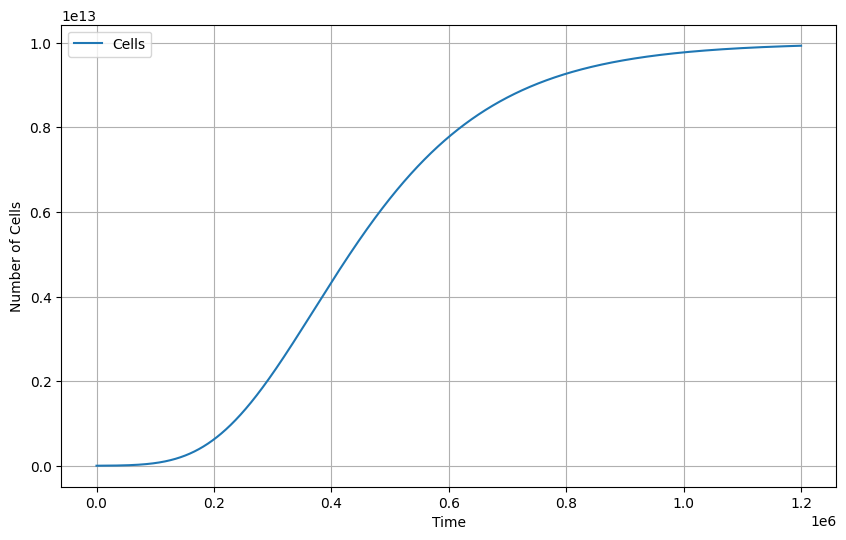

In [6]:
# plot the number of cells over time
plt.figure(figsize=(10, 6))
plt.plot(df_1['time'], df_1['cells'], label='Cells')
plt.xlabel('Time')
plt.ylabel('Number of Cells')
plt.legend()
plt.grid(True)
plt.show()

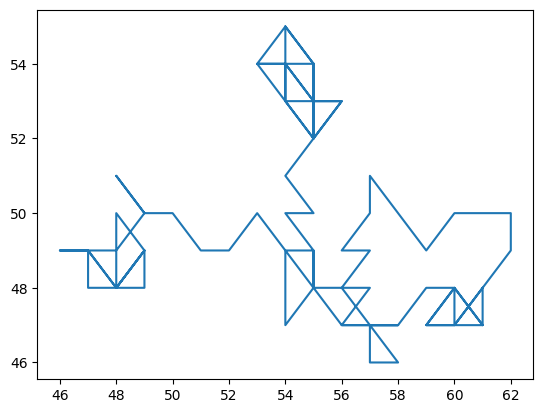

In [7]:
plt.plot(df_2['x'], df_2['y'], label='task2-1')
plt.show()

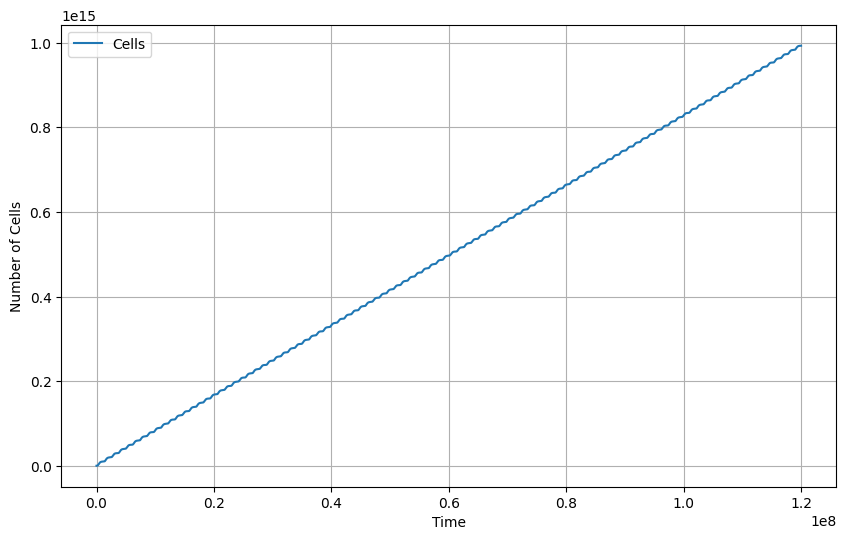

In [8]:
# plot the number of cells over time
plt.figure(figsize=(10, 6))
plt.plot(df_2_total['time'], df_2_total['cells'], label='Cells')
plt.xlabel('Time')
plt.ylabel('Number of Cells')
plt.legend()
plt.grid(True)
plt.show()